## Importing Modules

In [13]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

## Data Loading And Vectorization

In [14]:
train=pd.read_csv("train.csv")
val=pd.read_csv("validation.csv")
test=pd.read_csv("test.csv")

y_train,X_train=train["label"],train["message"]
y_val,X_val=val["label"],val["message"]
y_test,X_test=val["label"],val["message"]

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Logistic Regression

Accuracy On Training Data :  96.196 %
Accuracy On Test Data :  95.265 %
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       589
           1       1.00      0.69      0.82       108

    accuracy                           0.95       697
   macro avg       0.97      0.85      0.90       697
weighted avg       0.96      0.95      0.95       697



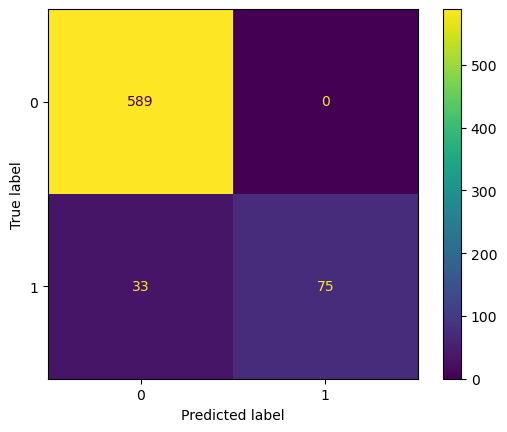

In [15]:
model_lr = LogisticRegression()

# Training The Logistic Regression Model With The Training Data
model_lr.fit(X_train_features, y_train)

# Prediction On Training Data
prediction_on_training_data = model_lr.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100,3)

print('Accuracy On Training Data : ', accuracy_on_training_data, "%")

# Prediction On Test Data
y_pred = model_lr.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

print('Accuracy On Test Data : ', accuracy_on_test_data, "%")

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_lr.classes_)
disp.plot()
plt.show()

## MLP Classifier

Accuracy On Training Data :  100.0 %
Accuracy On Test Data :  98.565 %
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       589
           1       1.00      0.91      0.95       108

    accuracy                           0.99       697
   macro avg       0.99      0.95      0.97       697
weighted avg       0.99      0.99      0.99       697



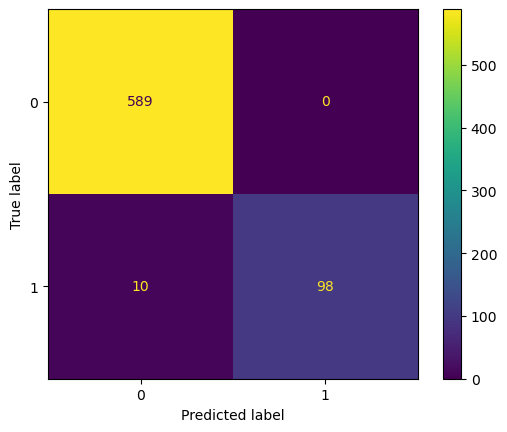

In [16]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train_features, y_train)

# Prediction On Training Data
prediction_on_training_data = model_mlp.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100, 3)

print('Accuracy On Training Data : ', accuracy_on_training_data, "%")

# Prediction On Test Data
y_pred = model_mlp.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

print('Accuracy On Test Data : ', accuracy_on_test_data, "%")

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_mlp.classes_)
disp.plot()
plt.show()

## Bernoulli NB

Accuracy On Training Data :  98.397 %
Accuracy On Test Data :  96.126 %
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       589
           1       0.99      0.76      0.86       108

    accuracy                           0.96       697
   macro avg       0.97      0.88      0.92       697
weighted avg       0.96      0.96      0.96       697



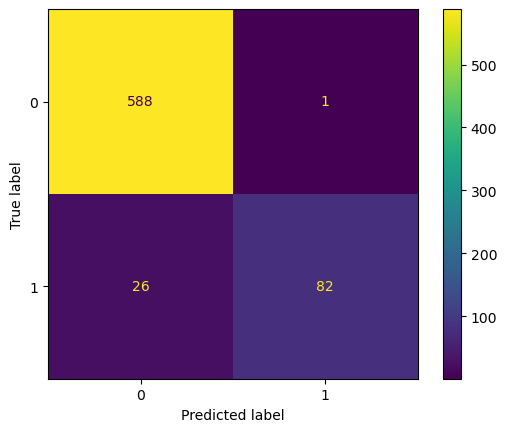

In [17]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train_features.toarray() , y_train)

# Prediction On Training Data

prediction_on_training_data = model_bnb.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy On Training Data : ', round(accuracy_on_training_data * 100,3), "%")

# Prediction On Test Data
y_pred = model_bnb.predict(X_test_features.toarray())
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

print('Accuracy On Test Data : ', accuracy_on_test_data, "%")

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model_bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_bnb.classes_)
disp.plot()
plt.show()

**The Multi Layer perceptron is the best performing model since maximizing Precision is the main goal in this task.**